# ~~~~~~~~~~~~~~~~~~ Exploratory Data Analysis ~~~~~~~~~~~~~~~~~~~~~

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---

## Dataset

In [107]:
anime_df = pd.read_csv('anime.csv')

In [108]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [109]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [110]:
anime_df.shape

(12294, 7)

In [111]:
anime_df['genre'] = anime_df['genre'].str.split(',').str[0]

In [112]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665
2,28977,Gintama°,Action,TV,51,9.25,114262
3,9253,Steins;Gate,Sci-Fi,TV,24,9.17,673572
4,9969,Gintama&#039;,Action,TV,51,9.16,151266


---

# Statistics

In [184]:
anime_df.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [114]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

#### Removing Null Values

In [122]:
anime_df = anime_df.dropna()

In [123]:
anime_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

#### After removing null values

In [124]:
anime_df.shape

(12017, 7)

In [245]:
type_dis = anime_df['type'].value_counts()
pd.DataFrame(type_dis)

,count
type,
TV,3668
OVA,3284
Movie,2259
Special,1670
ONA,648
Music,488


In [246]:
gen_dis = anime_df['genre'].value_counts()
pd.DataFrame(gen_dis)

,count
genre,
Comedy,3147
Action,2768
Adventure,1445
Drama,974
Hentai,940
Fantasy,484
Kids,394
Music,392
Dementia,205


#### Average rating by genre

In [249]:
avg_rating_by_genre = anime_df.groupby('genre')['rating'].mean().sort_values(ascending=False)
pd.DataFrame(avg_rating_by_genre)

,rating
genre,
Josei,7.366667
Mystery,7.060563
Drama,6.796561
Action,6.787150
Police,6.730000
Game,6.718378
Shounen,6.695102
Adventure,6.687218
Military,6.668500


#### Average rating by type

In [276]:
avg_rating_by_type = anime_df.groupby('type')['rating'].mean().sort_values(ascending=False)
pd.DataFrame(avg_rating_by_type)

,rating
type,
TV,6.903321
Special,6.523126
OVA,6.375411
Movie,6.334055
ONA,5.650293
Music,5.588996


In [278]:
rating_members_corr = anime_df['rating'].corr(anime_df['members'])
print(f'Correlation of ratings & members: {rating_members_corr}')

Correlation of ratings & members: 0.3884988570593549


In [125]:
anime_df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

1. **TV (Television Series):** Regular episodic anime series broadcast on television.
2. **Music:** Anime with a primary focus on music or idols.
3. **Movie:** Standalone anime films typically released in theaters.
4. **OVA (Original Video Animation):** Anime released directly to home video, often as a special episode or bonus content.
5. **ONA (Original Net Animation):** Anime distributed primarily through online streaming platforms.
6. **Special:** Short anime episodes or specials, often released as bonuses or promotions.

In [126]:
anime_df['genre'].unique()

array(['Drama', 'Action', 'Sci-Fi', 'Comedy', 'Adventure', 'Fantasy',
       'Mystery', 'Psychological', 'Ecchi', 'Josei', 'Military',
       'Romance', 'Demons', 'Dementia', 'Music', 'Game', 'Cars', 'Mecha',
       'Horror', 'School', 'Historical', 'Kids', 'Shounen', 'Shoujo',
       'Magic', 'Harem', 'Martial Arts', 'Sports', 'Slice of Life',
       'Seinen', 'Parody', 'Police', 'Thriller', 'Supernatural',
       'Samurai', 'Super Power', 'Vampire', 'Space', 'Hentai', 'Yaoi'],
      dtype=object)

1. **Drama:** Focuses on emotional and interpersonal conflicts, often portraying realistic human experiences.
2. **Action:** Involves intense physical activity, battles, or dynamic sequences.
3. **Sci-Fi (Science Fiction):** Explores futuristic or speculative concepts, often involving advanced technology or space exploration.
4. **Comedy:** Intended to amuse and entertain, often featuring humor and light-hearted content.
5. **Adventure:** Involves exciting and risky experiences, often in exotic or unknown settings.
6. **Fantasy:** Features magical elements, mythical creatures, or imaginative worlds.
7. **Mystery:** Involves solving a puzzle or uncovering hidden truths.
8. **Psychological:** Explores characters' minds, emotions, and mental states.
9. **Ecchi:** Contains mild sexual content or suggestive themes.
10. **Josei:** Targets a mature female audience, often dealing with realistic and complex relationships.
11. **Military:** Involves armed forces, warfare, or military themes.
12. **Romance:** Focuses on romantic relationships and love stories.
13. **Demons:** Features supernatural beings or entities with demonic characteristics.
14. **Dementia:** Explores characters with memory loss or mental disorders.
15. **Music:** Centers around musical themes, often featuring idols or musicians.
16. **Game:** Involves characters playing games, often with high stakes.
17. **Cars:** Features vehicles or racing as a central theme.
18. **Mecha:** Involves large robotic machines or mechs.
19. **Horror:** Intends to evoke fear or suspense, often with supernatural or frightening elements.
20. **School:** Takes place primarily in an educational setting.
21. **Historical:** Set in a specific historical period, often with attention to accuracy.
22. **Kids:** Geared towards a younger audience, typically featuring child protagonists.
23. **Shounen:** Targets a young male audience, often featuring action and adventure.
24. **Shoujo:** Targets a young female audience, often focusing on romance and relationships.
25. **Magic:** Involves supernatural elements related to magic or mystical powers.
26. **Harem:** Features a male protagonist surrounded by multiple romantic interests.
27. **Martial Arts:** Involves physical combat or martial arts techniques.
28. **Sports:** Centers around competitive sports and athletic activities.
29. **Slice of Life:** Depicts everyday life and ordinary experiences.
30. **Seinen:** Targets an adult male audience with mature themes.
31. **Parody:** Satirizes or mocks other genres or works.
32. **Police:** Involves law enforcement or crime-solving.
33. **Thriller:** Creates suspense and excitement, often with intense and thrilling plotlines.
34. **Supernatural:** Features elements beyond the natural world or reality.
35. **Samurai:** Set in historical Japan, often involving samurai warriors.
36. **Super Power:** Involves characters with extraordinary abilities or powers.
37. **Vampire:** Features characters with vampiric traits or themes.
38. **Space:** Set in outer space, often involving space travel or exploration.
39. **Hentai:** Contains explicit sexual content for adults.
40. **Yaoi:** Focuses on romantic or sexual relationships between male characters.

#### Top rated anime

In [274]:
top_rated_anime = anime_df[anime_df['rating'] == anime_df['rating'].max()]
pd.DataFrame(top_rated_anime)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,Comedy,Movie,1,10.0,13


#### Bottom rated anime

In [271]:
bottom_rated_anime = anime_df[anime_df['rating'] == anime_df['rating'].min()]
pd.DataFrame(bottom_rated_anime)

,anime_id,name,genre,type,episodes,rating,members
9991,34476,Platonic Chain: Ansatsu Jikkouchuu,Sci-Fi,Special,1,1.67,51


---

# Visualization

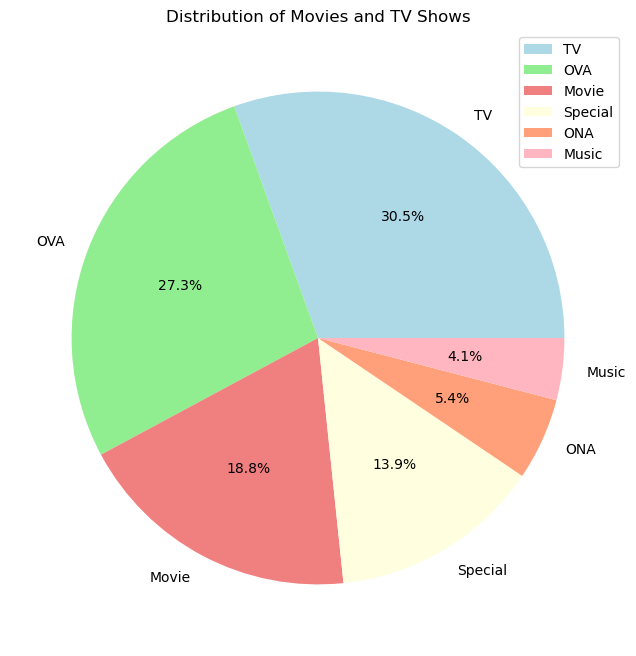

In [217]:
type_counts = anime_df['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightsalmon', 'lightpink'])
plt.title('Distribution of Movies and TV Shows')
plt.legend()
plt.show()

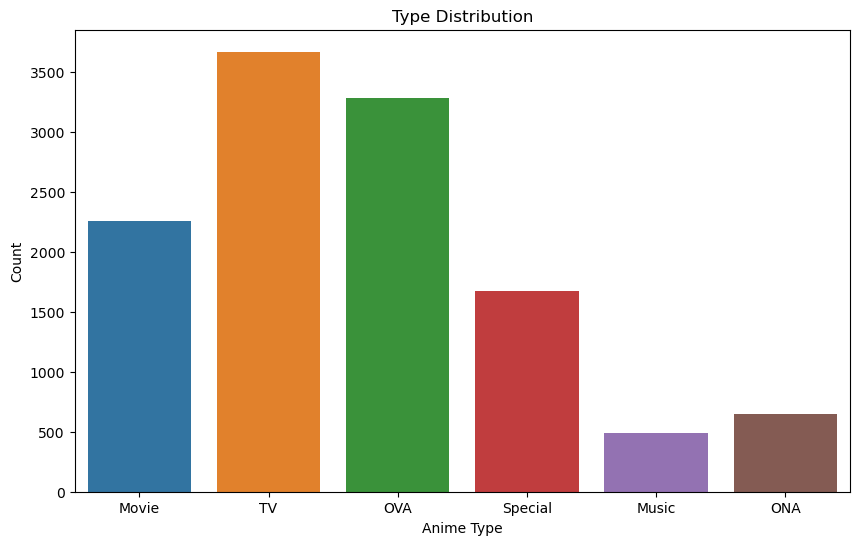

In [207]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=anime_df)
plt.title('Type Distribution')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.show()

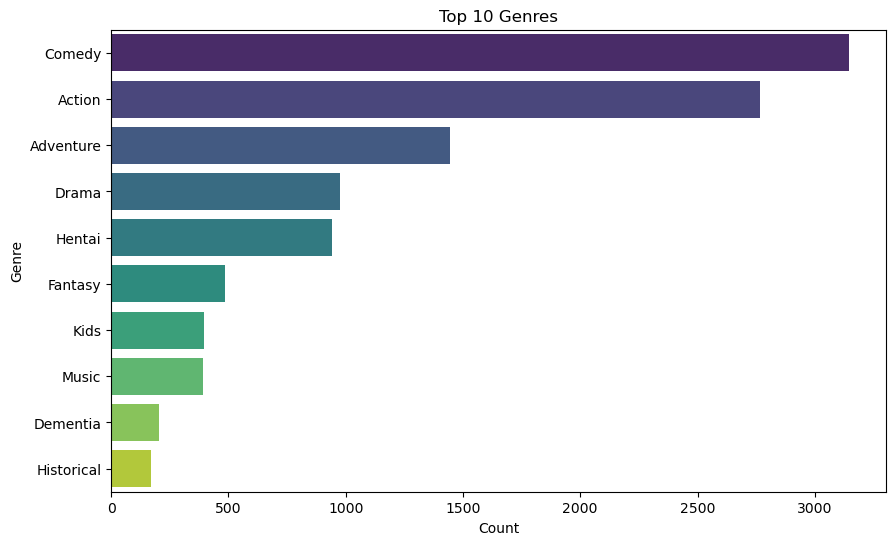

In [206]:
top_genres = anime_df['genre'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

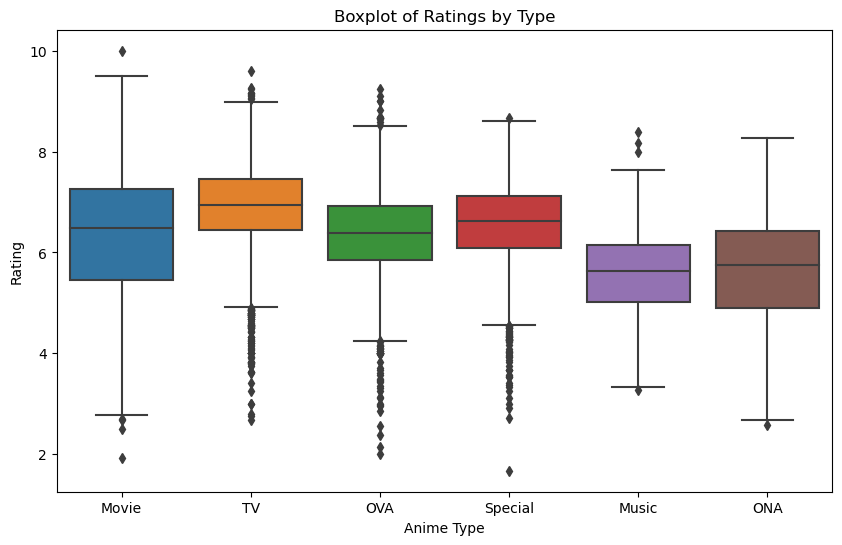

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=anime_df)
plt.title('Boxplot of Ratings by Type')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.show()

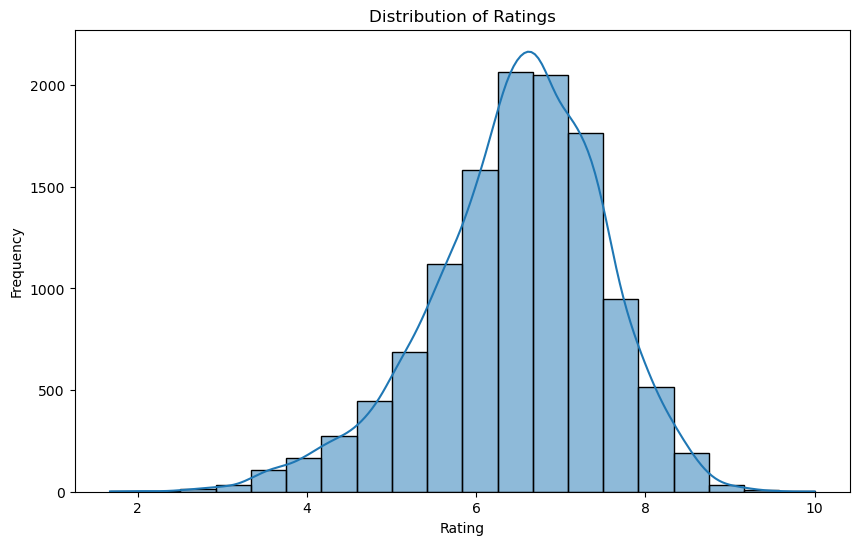

In [201]:
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

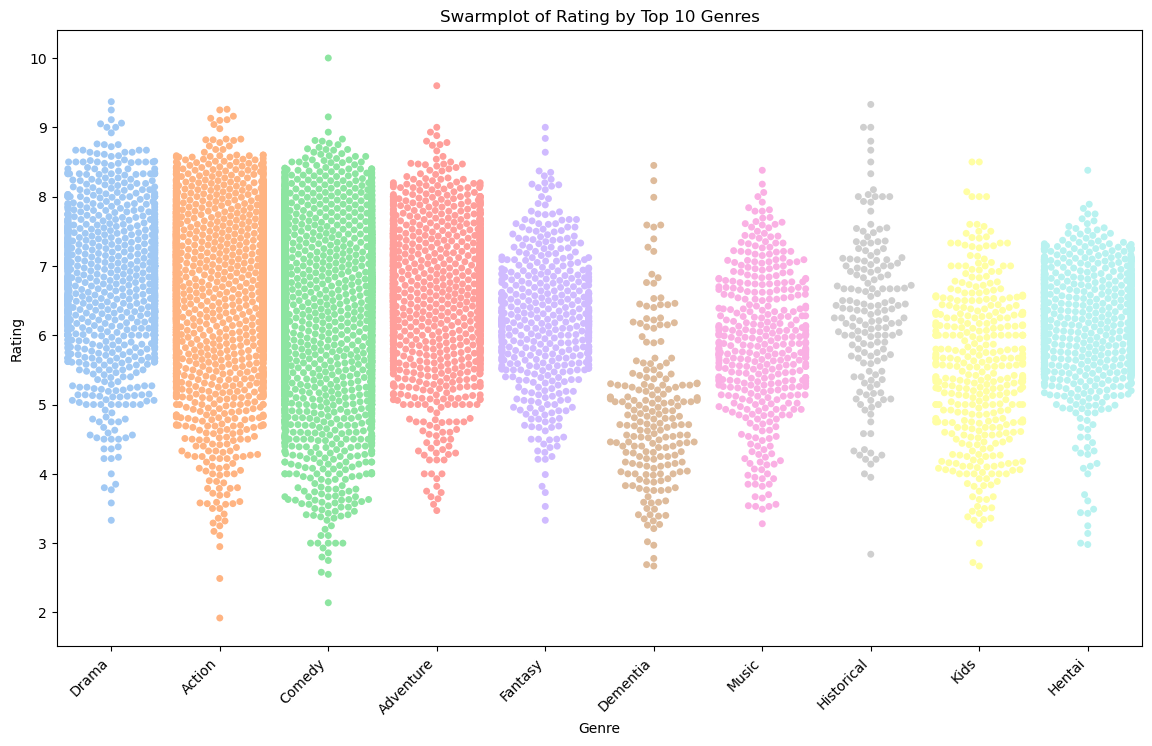

In [231]:
all_genres = anime_df['genre'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10).index

top_genres_df = anime_df[anime_df['genre'].str.split(',').explode().str.strip().isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.swarmplot(x='genre', y='rating', data=top_genres_df, palette='pastel')
plt.title('Swarmplot of Rating by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~ END ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~